In [1]:
import tensorflow
import pandas as pd
import numpy as np
import os
import zipfile


import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# List of zip file paths
zip_files = [
    'Annotations.zip',
    'Car Images.zip',
]

# Define the destination directory
destination_folder = 'dataset'

# Ensure the destination directory exists
os.makedirs(destination_folder, exist_ok=True)

# Iterate over each zip file and extract it
for zip_file_path in zip_files:
    if os.path.exists(zip_file_path):  # Check if the zip file exists
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract to the destination folder
            zip_ref.extractall(destination_folder)
            print(f"Extraction complete for: {zip_file_path}")
    else:
        print(f"File not found: {zip_file_path}")


Extraction complete for: Annotations.zip
Extraction complete for: Car Images.zip


In [3]:
class_names_data = pd.read_csv("Car names and make.csv", header=None, names=["class_name"])
train_annotate = pd.read_csv(destination_folder+"/Annotations/Train Annotations.csv", header=None, names=["image_file","x0","y0","x1","y1","class"], skiprows=1)
test_annotate = pd.read_csv(destination_folder+"/Annotations/Test Annotation.csv", header=None, names=["image_file","x0","y0","x1","y1","class"], skiprows=1)

In [72]:
#Showing Top 10 label of Class Name
class_names_data.head(5)

,class_name
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [74]:
#Showing Top 10 label of Train Annotation
train_annotate.head(5)

,image_file,x0,y0,x1,y1,class,car_image_path,class_name
0,00001.jpg,39,116,569,375,14,dataset/Car Images/Train Images/Audi TTS Coupe...,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,dataset/Car Images/Train Images/Acura TL Sedan...,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,dataset/Car Images/Train Images/Dodge Dakota C...,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,dataset/Car Images/Train Images/Hyundai Sonata...,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,dataset/Car Images/Train Images/Ford F-450 Sup...,Ford F-450 Super Duty Crew Cab 2012


In [76]:
#Showing Top 10 label of Test Annotation
test_annotate.head(5)

,image_file,x0,y0,x1,y1,class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [78]:
import seaborn as sns

# 1. Data Overview
print("Data Overview:")
print(class_names_data.head())
print("\nData Info:")
print(class_names_data.info())
print("\nSummary Statistics:")
print(class_names_data.describe())

# 2. Missing Values Check
print("\nMissing Values:")
print(class_names_data.isnull().sum())


Data Overview:
                   class_name
0  AM General Hummer SUV 2000
1         Acura RL Sedan 2012
2         Acura TL Sedan 2012
3        Acura TL Type-S 2008
4        Acura TSX Sedan 2012

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class_name  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None

Summary Statistics:
                        class_name
count                          196
unique                         196
top     AM General Hummer SUV 2000
freq                             1

Missing Values:
class_name    0
dtype: int64


In [80]:
import seaborn as sns

# 1. Data Overview
print("Data Overview:")
print(test_annotate.head())
print("\nData Info:")
print(test_annotate.info())
print("\nSummary Statistics:")
print(test_annotate.describe())

# 2. Missing Values Check
print("\nMissing Values:")
print(test_annotate.isnull().sum())

# # 3. Distribution of Class Labels
# plt.figure(figsize=(10, 6))
# sns.countplot(data=train_annotate, x='class_name')
# plt.title('Distribution of Car Classes')
# plt.xlabel('Car Class')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()

Data Overview:
  image_file   x0   y0   x1   y1  class
0  00001.jpg   30   52  246  147    181
1  00002.jpg  100   19  576  203    103
2  00003.jpg   51  105  968  659    145
3  00004.jpg   67   84  581  407    187
4  00005.jpg  140  151  593  339    185

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_file  8041 non-null   object
 1   x0          8041 non-null   int64 
 2   y0          8041 non-null   int64 
 3   x1          8041 non-null   int64 
 4   y1          8041 non-null   int64 
 5   class       8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB
None

Summary Statistics:
                x0           y0           x1           y1        class
count  8041.000000  8041.000000  8041.000000  8041.000000  8041.000000
mean     65.057456   107.816192   639.433777   417.301828    98.975501
std      82.3364

In [82]:
import seaborn as sns

# 1. Data Overview
print("Data Overview:")
print(train_annotate.head())
print("\nData Info:")
print(train_annotate.info())
print("\nSummary Statistics:")
print(train_annotate.describe())

# 2. Missing Values Check
print("\nMissing Values:")
print(train_annotate.isnull().sum())

# # 3. Distribution of Class Labels
# plt.figure(figsize=(10, 6))
# sns.countplot(data=train_annotate, x='class_name')
# plt.title('Distribution of Car Classes')
# plt.xlabel('Car Class')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()

Data Overview:
  image_file   x0   y0    x1    y1  class  \
0  00001.jpg   39  116   569   375     14   
1  00002.jpg   36  116   868   587      3   
2  00003.jpg   85  109   601   381     91   
3  00004.jpg  621  393  1484  1096    134   
4  00005.jpg   14   36   133    99    106   

                                      car_image_path  \
0  dataset/Car Images/Train Images/Audi TTS Coupe...   
1  dataset/Car Images/Train Images/Acura TL Sedan...   
2  dataset/Car Images/Train Images/Dodge Dakota C...   
3  dataset/Car Images/Train Images/Hyundai Sonata...   
4  dataset/Car Images/Train Images/Ford F-450 Sup...   

                            class_name  
0                  Audi TTS Coupe 2012  
1                  Acura TL Sedan 2012  
2           Dodge Dakota Club Cab 2007  
3     Hyundai Sonata Hybrid Sedan 2012  
4  Ford F-450 Super Duty Crew Cab 2012  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 8 columns):
 #   Column  

In [7]:
def get_image_file_list(image_path):
    image_dir = os.listdir(image_path)
    image_list = []

    for i in image_dir:
        # Skip .DS_Store files in the main directory
        if i == '.DS_Store':
            continue
        
        # Build the full path to subdirectory
        subdir_path = os.path.join(image_path, i)
        
        # List files in the subdirectory
        for f in os.listdir(subdir_path):
            # Skip .DS_Store files in subdirectories
            if f == '.DS_Store':
                continue
            #print("{}/{}".format(i, f))
            # Check file extension. Allow only jpg/jpeg files.
            ext = os.path.splitext(f)[1].lower()  # Case-insensitive check for extensions
            #print(ext)
            if ext == '.jpg' or ext == '.jpeg':
                image_list.append("{}/{}".format(i, f))
                #print("{}/{}".format(i, f))
    return image_list


In [8]:
def map_image_metadata(image_base_path, annotate_metadata, image_path_list):
  image_path_lst_split = [i.split('/')[1] for i in image_path_list]
  annotate_metadata["car_image_path"] = annotate_metadata.apply(
      lambda row: image_base_path + image_path_list[image_path_lst_split.index(row['image_file'])], 
      axis=1)
  return annotate_metadata

In [9]:
train_image_path = destination_folder + "/Car Images/Train Images/"
train_image_list = get_image_file_list(train_image_path)

In [10]:
# Get the count of items in the list
count = len(train_image_list)
print(count)  # Output: 3

8144


In [11]:
train_annotate = map_image_metadata(train_image_path, train_annotate, train_image_list)
train_annotate['class_name'] = train_annotate.apply(lambda x: class_names_data['class_name'][(x['class']-1)], axis=1)

In [12]:
#Let's see how the training annotation looks now
train_annotate.head(11)

,image_file,x0,y0,x1,y1,class,car_image_path,class_name
0,00001.jpg,39,116,569,375,14,dataset/Car Images/Train Images/Audi TTS Coupe...,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,dataset/Car Images/Train Images/Acura TL Sedan...,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,dataset/Car Images/Train Images/Dodge Dakota C...,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,dataset/Car Images/Train Images/Hyundai Sonata...,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,dataset/Car Images/Train Images/Ford F-450 Sup...,Ford F-450 Super Duty Crew Cab 2012
5,00006.jpg,259,289,515,416,123,dataset/Car Images/Train Images/Geo Metro Conv...,Geo Metro Convertible 1993
6,00007.jpg,88,80,541,397,89,dataset/Car Images/Train Images/Dodge Journey ...,Dodge Journey SUV 2012
7,00008.jpg,73,79,591,410,96,dataset/Car Images/Train Images/Dodge Charger ...,Dodge Charger Sedan 2012
8,00009.jpg,20,126,1269,771,167,dataset/Car Images/Train Images/Mitsubishi Lan...,Mitsubishi Lancer Sedan 2012
9,00010.jpg,21,110,623,367,58,dataset/Car Images/Train Images/Chevrolet Trav...,Chevrolet Traverse SUV 2012


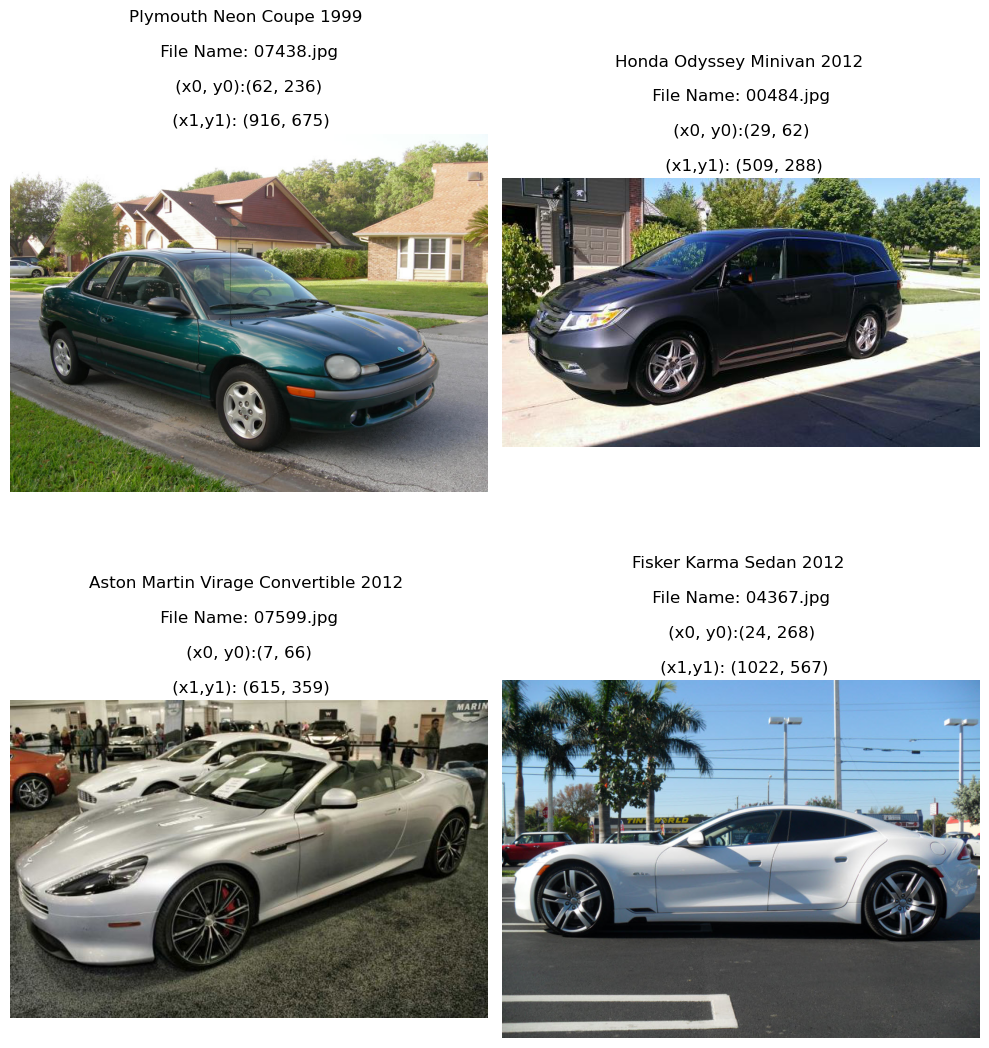

In [46]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

# Define the function to show images with a border
def show_image_with_border(title, image_path, ax):
    # Read the image using OpenCV
    img = cv2.imread(image_path, 1)
    # Convert from BGR (OpenCV default) to RGB (matplotlib format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Set the title and display the image
    ax.set_title(title)
    ax.imshow(img)
    ax.axis('off')  # Hide axes for a cleaner display

# Select 4 random rows from the DataFrame (since it's 2x2 layout)
random_rows = train_annotate.sample(n=4, random_state=42)  # Adjust random_state for reproducibility

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 12))  # Adjust figsize for desired output size

# Flatten the axes array to make iteration easier
axes = axes.flatten()

# Iterate over the 4 random rows and plot the images in the subplots
for i, (_, row) in enumerate(random_rows.iterrows()):
    title = f"{row['class_name']} \n\n File Name: {row['image_file']} \n\n (x0, y0):({str(row['x0'])}, {str(row['y0'])}) \n\n (x1,y1): ({str(row['x1'])}, {str(row['y1'])})"
    image_path = row["car_image_path"]
    show_image_with_border(title, image_path, axes[i])

# Hide the empty subplot (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the images in the 2x2 layout
plt.tight_layout()
plt.show()

In [ ]:
# 1. Data Overview
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 2. Missing Values Check
print("\nMissing Values:")
print(df.isnull().sum())